In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
latencies = pd.read_csv("results.csv").set_index("i")
# latencies

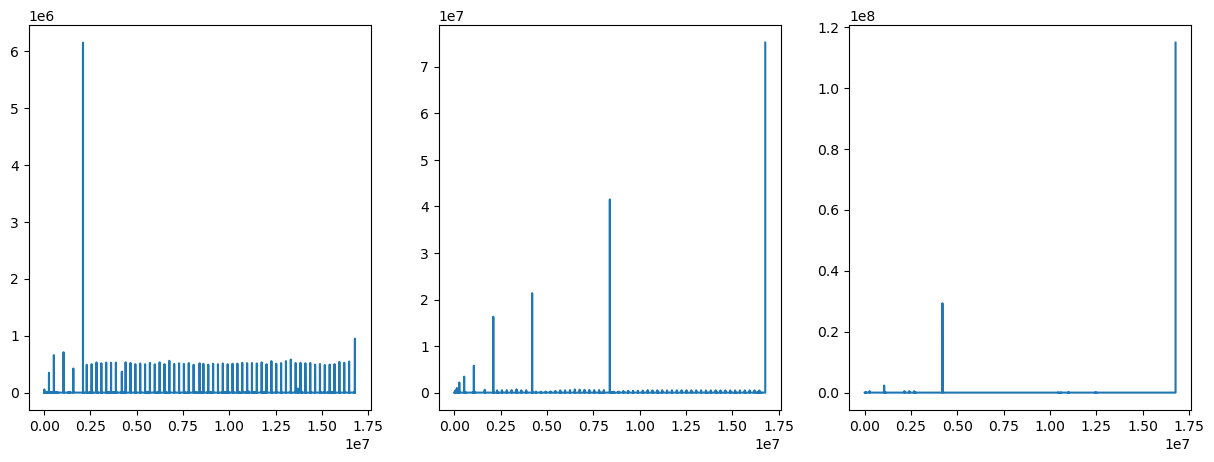

In [5]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 5))

ax1.plot(latencies["alpha_push"])
ax2.plot(latencies["double_push"])
ax3.plot(latencies["hat_push"])

(0.0, 6154394.0)

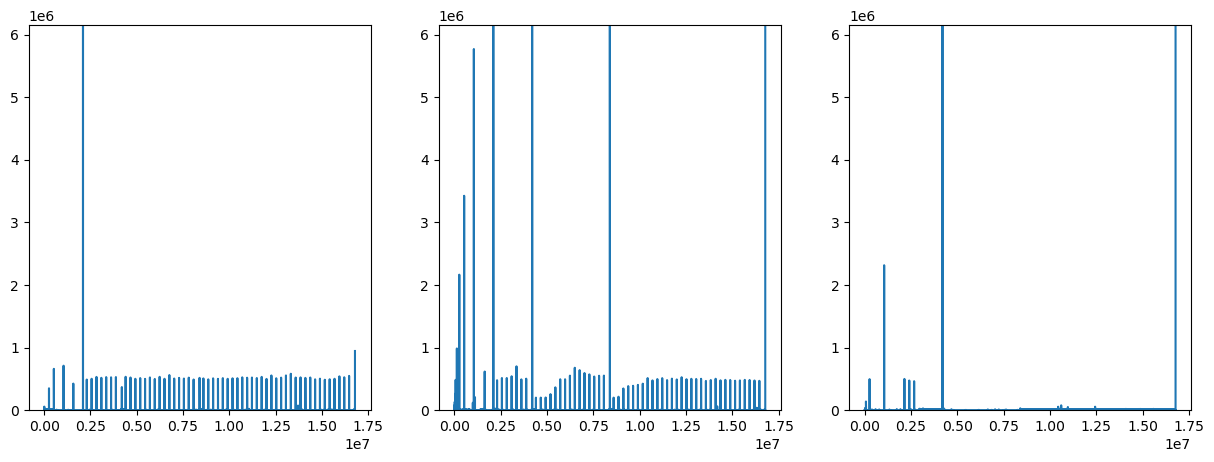

In [6]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 5))
data_max = latencies["alpha_push"].max()

ax1.plot(latencies["alpha_push"])
ax1.set_ylim(0, data_max)
ax2.plot(latencies["double_push"])
ax2.set_ylim(0, data_max)
ax3.plot(latencies["hat_push"])
ax3.set_ylim(0, data_max)